Testing with n = 1000
Testing with n = 5000
Testing with n = 10000
Testing with n = 100000


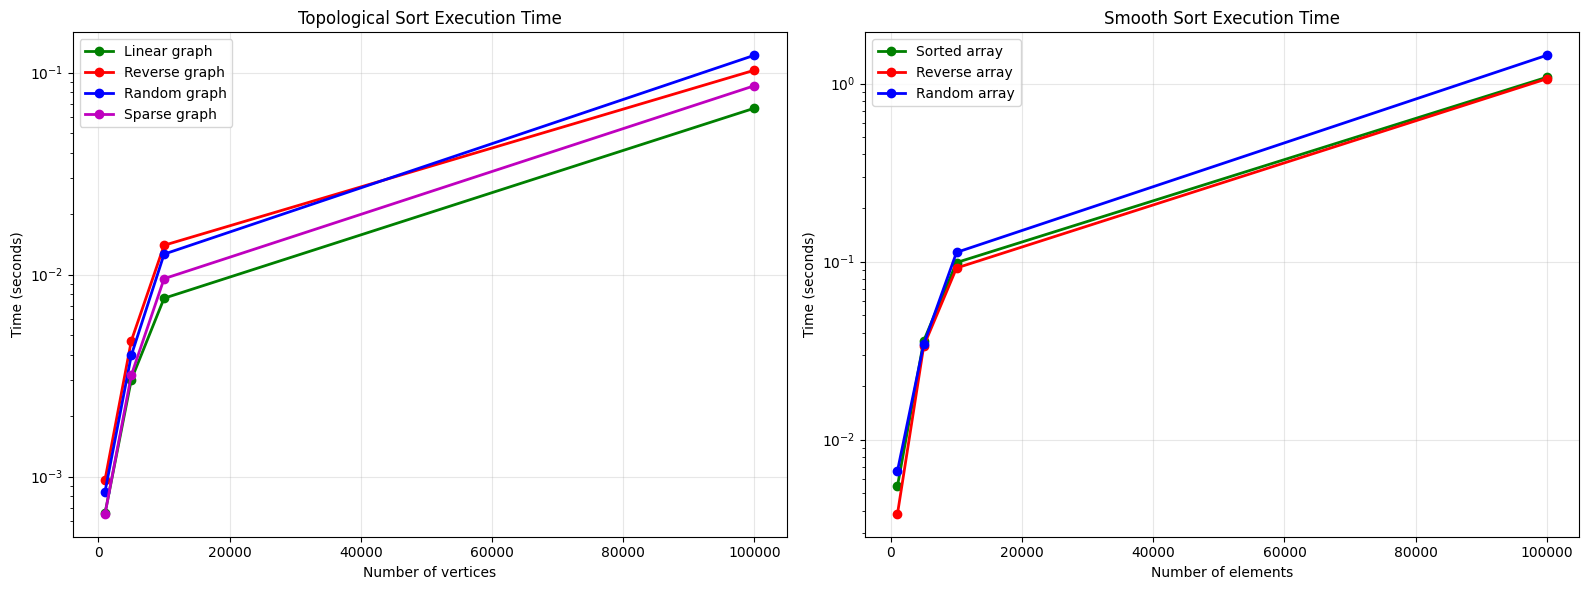


РЕЗУЛЬТАТЫ ТЕСТИРОВАНИЯ

ТОПОЛОГИЧЕСКАЯ СОРТИРОВКА:
n        Linear       Reverse      Random       Sparse      
1000     0.000659     0.000966     0.000843     0.000655    
5000     0.003015     0.004695     0.003978     0.003177    
10000    0.007638     0.013967     0.012625     0.009543    
100000   0.066613     0.102693     0.121772     0.086053    

ПЛАВНАЯ СОРТИРОВКА:
n        Sorted       Reverse      Random      
1000     0.005493     0.003835     0.006687    
5000     0.035924     0.033591     0.034366    
10000    0.098857     0.092135     0.112772    
100000   1.085953     1.064884     1.443205    


In [2]:
import random
import time
import matplotlib.pyplot as plt

def get_usage_time():
    def decorator(func):
        def wrapper(*args, **kwargs):
            start_time = time.time()
            result = func(*args, **kwargs)
            end_time = time.time()
            return end_time - start_time
        return wrapper
    return decorator

def topological_sort(graph, n):
    from collections import deque
    
    indegree = [0] * n
    for u in range(n):
        for v in graph[u]:
            indegree[v] += 1
    
    queue = deque([i for i in range(n) if indegree[i] == 0])
    result = []
    
    while queue:
        u = queue.popleft()
        result.append(u)
        for v in graph[u]:
            indegree[v] -= 1
            if indegree[v] == 0:
                queue.append(v)
    
    return result

def smooth_sort(arr):
    def sift_down(arr, start, end):
        root = start
        while (child := 2 * root + 1) <= end:
            if child + 1 <= end and arr[child] < arr[child + 1]:
                child += 1
            if arr[root] < arr[child]:
                arr[root], arr[child] = arr[child], arr[root]
                root = child
            else:
                break
        return arr
    
    n = len(arr)
    
    for i in range((n - 2) // 2, -1, -1):
        sift_down(arr, i, n - 1)
    
    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        sift_down(arr, 0, i - 1)
    
    return arr

n1_n2_n3_n4 = [1000, 5000, 10000, 100000]
num_trials = 3

results = {
    "Topological Sort": {"sorted": [], "reverse": [], "random": [], "sparse": []},
    "Smooth Sort": {"sorted": [], "reverse": [], "random": []}
}

def create_sorted_graph(n):
    """Граф с линейной структурой (0->1->2->...)"""
    graph = [[] for _ in range(n)]
    for i in range(n-1):
        graph[i].append(i+1)
        return graph

def create_reverse_graph(n):
    """Граф с обратной линейной структурой"""
    graph = [[] for _ in range(n)]
    for i in range(1, n):
        graph[i].append(i-1)
    return graph

def create_random_graph(n):
    """Случайный граф с 2n ребрами"""
    graph = [[] for _ in range(n)]
    for _ in range(2 * n):
        u = random.randint(0, n-1)
        v = random.randint(0, n-1)
        if u != v and v not in graph[u]:
            graph[u].append(v)
    return graph

def create_sparse_graph(n):
    """Разреженный граф с n/10 ребрами"""
    graph = [[] for _ in range(n)]
    edges_count = max(1, n // 10)
    for _ in range(edges_count):
        u = random.randint(0, n-1)
        v = random.randint(0, n-1)
        if u != v and v not in graph[u]:
            graph[u].append(v)
    return graph

for n in n1_n2_n3_n4:
    print(f"Testing with n = {n}")
    
    graph_sorted = create_sorted_graph(n)
    graph_reverse = create_reverse_graph(n)
    graph_random = create_random_graph(n)
    graph_sparse = create_sparse_graph(n)
    arr_sorted = list(range(n))
    arr_reverse = list(range(n, 0, -1))
    arr_random = [random.randint(1, n) for _ in range(n)]
    
    topological_func = get_usage_time()(topological_sort)
    
    t_sorted = sum(topological_func(graph_sorted, n) for _ in range(num_trials)) / num_trials
    t_reverse = sum(topological_func(graph_reverse, n) for _ in range(num_trials)) / num_trials
    t_random = sum(topological_func(graph_random, n) for _ in range(num_trials)) / num_trials
    t_sparse = sum(topological_func(graph_sparse, n) for _ in range(num_trials)) / num_trials
    
    results["Topological Sort"]["sorted"].append(t_sorted)
    results["Topological Sort"]["reverse"].append(t_reverse)
    results["Topological Sort"]["random"].append(t_random)
    results["Topological Sort"]["sparse"].append(t_sparse)
    
    # Тестирование плавной сортировки
    smooth_func = get_usage_time()(smooth_sort)
    
    t_sorted = sum(smooth_func(arr_sorted.copy()) for _ in range(num_trials)) / num_trials
    t_reverse = sum(smooth_func(arr_reverse.copy()) for _ in range(num_trials)) / num_trials
    t_random = sum(smooth_func(arr_random.copy()) for _ in range(num_trials)) / num_trials
    
    results["Smooth Sort"]["sorted"].append(t_sorted)
    results["Smooth Sort"]["reverse"].append(t_reverse)
    results["Smooth Sort"]["random"].append(t_random)

# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Топологическая сортировка
axes[0].plot(n1_n2_n3_n4, results["Topological Sort"]["sorted"], 'go-', label='Linear graph', linewidth=2, markersize=6)
axes[0].plot(n1_n2_n3_n4, results["Topological Sort"]["reverse"], 'ro-', label='Reverse graph', linewidth=2, markersize=6)
axes[0].plot(n1_n2_n3_n4, results["Topological Sort"]["random"], 'bo-', label='Random graph', linewidth=2, markersize=6)
axes[0].plot(n1_n2_n3_n4, results["Topological Sort"]["sparse"], 'mo-', label='Sparse graph', linewidth=2, markersize=6)
axes[0].set_title('Topological Sort Execution Time')
axes[0].set_xlabel('Number of vertices')
axes[0].set_ylabel('Time (seconds)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')  # Логарифмическая шкала для лучшей визуализации

# Плавная сортировка
axes[1].plot(n1_n2_n3_n4, results["Smooth Sort"]["sorted"], 'go-', label='Sorted array', linewidth=2, markersize=6)
axes[1].plot(n1_n2_n3_n4, results["Smooth Sort"]["reverse"], 'ro-', label='Reverse array', linewidth=2, markersize=6)
axes[1].plot(n1_n2_n3_n4, results["Smooth Sort"]["random"], 'bo-', label='Random array', linewidth=2, markersize=6)
axes[1].set_title('Smooth Sort Execution Time')
axes[1].set_xlabel('Number of elements')
axes[1].set_ylabel('Time (seconds)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_yscale('log')  # Логарифмическая шкала для лучшей визуализации

plt.tight_layout()
plt.show()

# Вывод результатов в табличном виде
print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ ТЕСТИРОВАНИЯ")
print("="*60)

print("\nТОПОЛОГИЧЕСКАЯ СОРТИРОВКА:")
print(f"{'n':<8} {'Linear':<12} {'Reverse':<12} {'Random':<12} {'Sparse':<12}")
for i, n in enumerate(n1_n2_n3_n4):
    print(f"{n:<8} {results['Topological Sort']['sorted'][i]:<12.6f} "
          f"{results['Topological Sort']['reverse'][i]:<12.6f} "
          f"{results['Topological Sort']['random'][i]:<12.6f} "
          f"{results['Topological Sort']['sparse'][i]:<12.6f}")

print("\nПЛАВНАЯ СОРТИРОВКА:")
print(f"{'n':<8} {'Sorted':<12} {'Reverse':<12} {'Random':<12}")
for i, n in enumerate(n1_n2_n3_n4):
    print(f"{n:<8} {results['Smooth Sort']['sorted'][i]:<12.6f} "
          f"{results['Smooth Sort']['reverse'][i]:<12.6f} "
          f"{results['Smooth Sort']['random'][i]:<12.6f}")